### Outlier detection and Outlier handling techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Create sample data
data = {
    'values': [10, 12, 15, 18, 20, 22, 25, 28, 30, 100, 2, 150]
}

df = pd.DataFrame(data)

In [3]:
# Step 2: Calculate IQR
def find_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print the bounds for understanding
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound



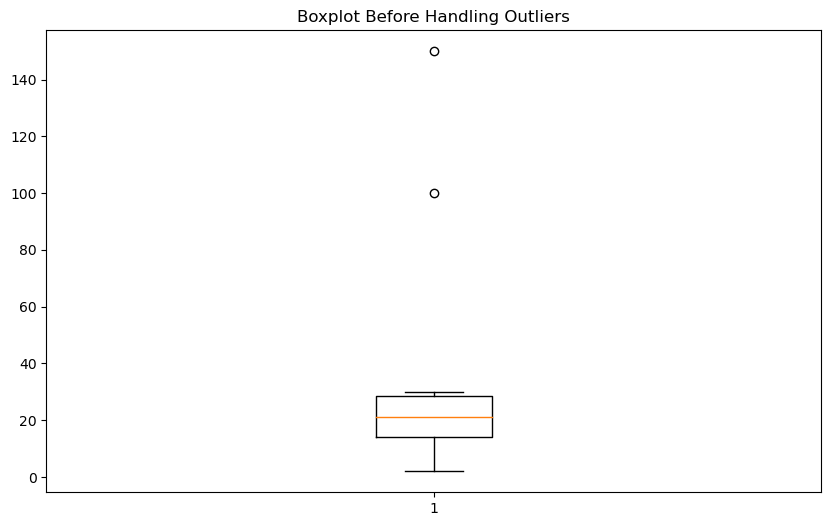

In [4]:
# Step 3: Visualize data before handling outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['values'])
plt.title('Boxplot Before Handling Outliers')
plt.show()


In [5]:

# Step 4: Find outliers
outliers, lower_bound, upper_bound = find_outliers_iqr(df, 'values')
print("\nOutliers found:")
print(outliers)


Lower bound: -7.125
Upper bound: 49.875

Outliers found:
    values
9      100
11     150


In [6]:

# Step 5: Handle outliers by capping
def handle_outliers_iqr(df, column, lower_bound, upper_bound):
    df_clean = df.copy()
    
    # Cap the values at the bounds
    df_clean[column] = df_clean[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_clean


In [7]:

# Apply the handling
df_clean = handle_outliers_iqr(df, 'values', lower_bound, upper_bound)



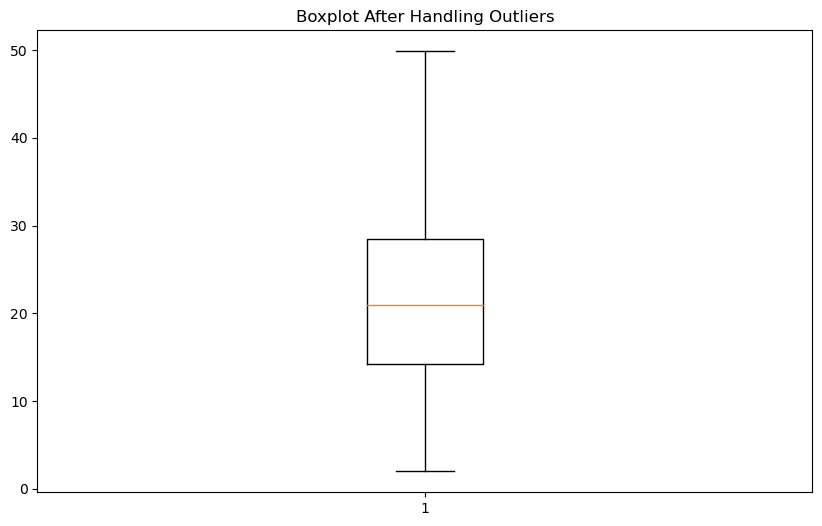

In [8]:
# Step 6: Visualize data after handling outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df_clean['values'])
plt.title('Boxplot After Handling Outliers')
plt.show()


In [9]:

# Print results
print("\nOriginal Data:")
print(df['values'])
print("\nCleaned Data:")
print(df_clean['values'])


Original Data:
0      10
1      12
2      15
3      18
4      20
5      22
6      25
7      28
8      30
9     100
10      2
11    150
Name: values, dtype: int64

Cleaned Data:
0     10.000
1     12.000
2     15.000
3     18.000
4     20.000
5     22.000
6     25.000
7     28.000
8     30.000
9     49.875
10     2.000
11    49.875
Name: values, dtype: float64


In [10]:
# method 2

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:

# Step 1: Create sample data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(100, 10, 100),  # Normal data
    np.array([150, 160, 40, 45])     # Outliers
])

df = pd.DataFrame(data, columns=['values'])
df.head()


,values
0,104.967142
1,98.617357
2,106.476885
3,115.230299
4,97.658466


In [14]:
# Step 2: Calculate Z-scores
def calculate_z_scores(data):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return z_scores

df['z_score'] = calculate_z_scores(df['values'])



In [15]:
# Step 3: Identify outliers (typically |z| > 3)
def identify_outliers(df, z_threshold=3):
    outliers = df[abs(df['z_score']) > z_threshold]
    normal = df[abs(df['z_score']) <= z_threshold]
    return outliers, normal

outliers, normal_data = identify_outliers(df)



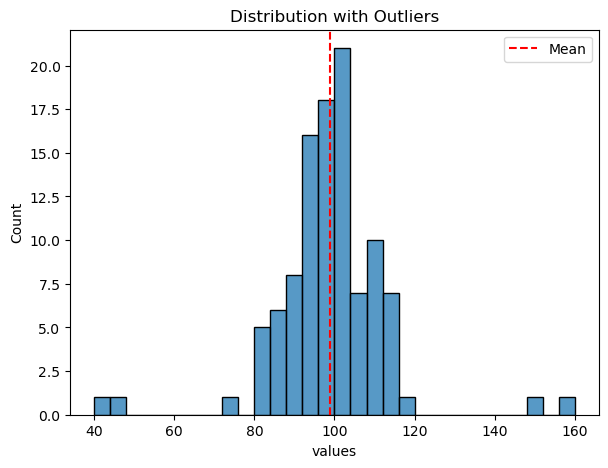

In [16]:
# Step 4: Visualize the data
plt.figure(figsize=(15, 5))

# Original Data Distribution
plt.subplot(121)
sns.histplot(data=df['values'], bins=30)
plt.title('Distribution with Outliers')
plt.axvline(df['values'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()


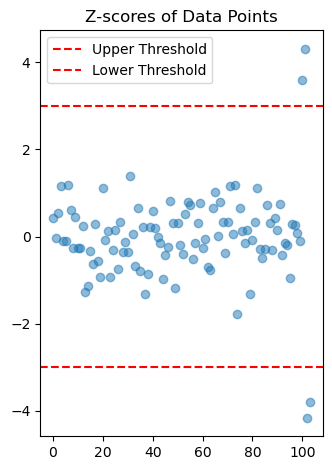

In [17]:

# Z-scores
plt.subplot(122)
plt.scatter(range(len(df)), df['z_score'], alpha=0.5)
plt.axhline(y=3, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-3, color='r', linestyle='--', label='Lower Threshold')
plt.title('Z-scores of Data Points')
plt.legend()
plt.tight_layout()
plt.show()


In [18]:

# Print results
print("Identified Outliers:")
print(outliers[['values', 'z_score']])


Identified Outliers:
     values   z_score
100   150.0  3.602261
101   160.0  4.307942
102    40.0 -4.160228
103    45.0 -3.807388


In [19]:

# Step 5: Remove outliers
df_clean = df[abs(df['z_score']) <= 3]


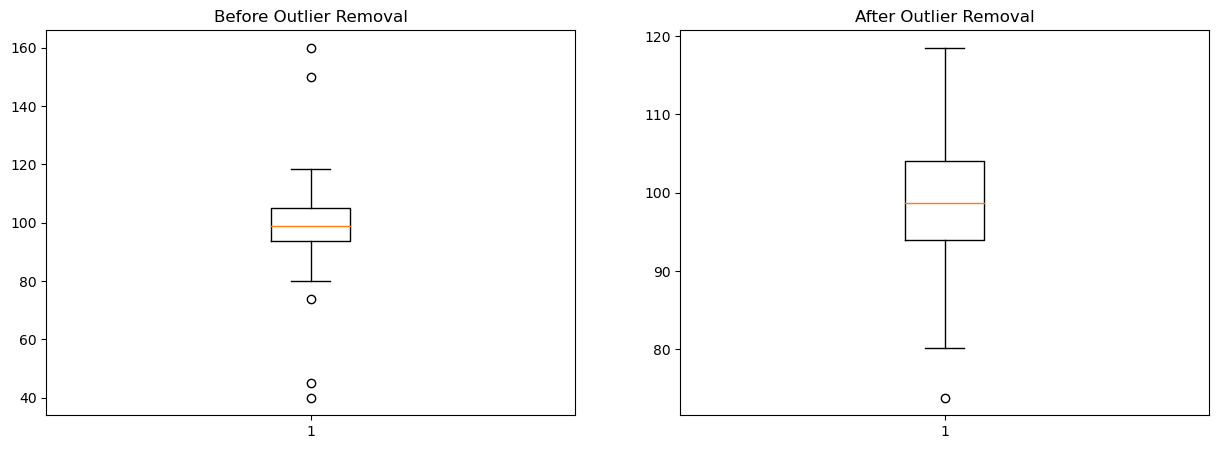

In [20]:

# Visualize before and after outlier removal
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.boxplot(df['values'])
plt.title('Before Outlier Removal')

plt.subplot(122)
plt.boxplot(df_clean['values'])
plt.title('After Outlier Removal')

plt.show()


In [21]:

# Print summary statistics
print("\nSummary Statistics:")
print("\nBefore cleaning:")
print(df['values'].describe())
print("\nAfter cleaning:")
print(df_clean['values'].describe())


Summary Statistics:

Before cleaning:
count    104.000000
mean      98.953399
std       14.239336
min       40.000000
25%       93.874401
50%       98.730437
75%      105.008525
max      160.000000
Name: values, dtype: float64

After cleaning:
count    100.000000
mean      98.961535
std        9.081684
min       73.802549
25%       93.990943
50%       98.730437
75%      104.059521
max      118.522782
Name: values, dtype: float64
